# 🔰========= Summary ========== 🔰
  * ## **Dataset**: Food 101
  * ## Food 101 [Paper](https://data.vision.ee.ethz.ch/cvl/datasets_extra/food-101/static/bossard_eccv14_food-101.pdf)
    * ### Original authors used random forrest
    * ### Reference accuracy to beat: 50%

  * ## Use [EfficientNetB7](https://arxiv.org/pdf/1905.11946.pdf) as base model for transfer learning
    * ### EfficientNet-B7 peformed the best out of all the EffNetBx models.  

  

![Food 101 Dataset](https://drive.google.com/uc?id=11GQC42rxLrYiaFXOenC1SnQNqYZbqFqw)
![Food 101 Dataset](../ref_images/ref_04_transfer_learning_06.PNG)

<br>
<br>

![EffNetB7](https://drive.google.com/uc?id=1ZTrS3fVdwVqnRhcyzvt0PNmfp3lbUxZU)
![EffNetB7](../ref_images/ref_04_transfer_learning_07.PNG)

# 🔰======== Import Helper Scripts & Data ========= 🔰


In [1]:
!nvidia-smi

Fri Jun  3 00:05:30 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
!wget https://raw.githubusercontent.com/delta2echo/tensorflow_portfolio/main/scripts/helper_functions.py

--2022-06-03 00:05:32--  https://raw.githubusercontent.com/delta2echo/tensorflow_portfolio/main/scripts/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22164 (22K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  21.64K  --.-KB/s    in 0.001s  

2022-06-03 00:05:32 (16.4 MB/s) - ‘helper_functions.py’ saved [22164/22164]



In [3]:
!wget http://data.vision.ee.ethz.ch/cvl/food-101.tar.gz

--2022-06-03 00:05:35--  http://data.vision.ee.ethz.ch/cvl/food-101.tar.gz
Resolving data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)... 129.132.52.178, 2001:67c:10ec:36c2::178
Connecting to data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)|129.132.52.178|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://data.vision.ee.ethz.ch/cvl/food-101.tar.gz [following]
--2022-06-03 00:05:35--  https://data.vision.ee.ethz.ch/cvl/food-101.tar.gz
Connecting to data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)|129.132.52.178|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4996278331 (4.7G) [application/x-gzip]
Saving to: ‘food-101.tar.gz’

food-101.tar.gz     100%[===================>]   4.65G  27.5MB/s    in 2m 55s  

2022-06-03 00:08:30 (27.3 MB/s) - ‘food-101.tar.gz’ saved [4996278331/4996278331]



# 🔰========= Setup ========== 🔰
  * Create a usable directory structure (similar to previous notebooks)
  * Move files into a usable directory structure

In [4]:
from helper_functions import unzip_files, count_files, get_class_names
from helper_functions import make_subfolders, move_files

In [5]:
unzip_files('food-101.tar.gz')

Done!


In [6]:
image_folder = 'food-101/images'

In [7]:
count_files(image_folder)

There are 1000 images in "food-101/images/risotto".
There are 1000 images in "food-101/images/creme_brulee".
There are 1000 images in "food-101/images/greek_salad".
There are 1000 images in "food-101/images/grilled_salmon".
There are 1000 images in "food-101/images/lobster_bisque".
There are 1000 images in "food-101/images/lobster_roll_sandwich".
There are 1000 images in "food-101/images/falafel".
There are 1000 images in "food-101/images/cheese_plate".
There are 1000 images in "food-101/images/pad_thai".
There are 1000 images in "food-101/images/chicken_wings".
There are 1000 images in "food-101/images/spaghetti_carbonara".
There are 1000 images in "food-101/images/hamburger".
There are 1000 images in "food-101/images/club_sandwich".
There are 1000 images in "food-101/images/foie_gras".
There are 1000 images in "food-101/images/macarons".
There are 1000 images in "food-101/images/baby_back_ribs".
There are 1000 images in "food-101/images/oysters".
There are 1000 images in "food-101/im

In [8]:
class_names = get_class_names(image_folder)

['apple_pie' 'baby_back_ribs' 'baklava' 'beef_carpaccio' 'beef_tartare'
 'beet_salad' 'beignets' 'bibimbap' 'bread_pudding' 'breakfast_burrito'
 'bruschetta' 'caesar_salad' 'cannoli' 'caprese_salad' 'carrot_cake'
 'ceviche' 'cheese_plate' 'cheesecake' 'chicken_curry'
 'chicken_quesadilla' 'chicken_wings' 'chocolate_cake' 'chocolate_mousse'
 'churros' 'clam_chowder' 'club_sandwich' 'crab_cakes' 'creme_brulee'
 'croque_madame' 'cup_cakes' 'deviled_eggs' 'donuts' 'dumplings' 'edamame'
 'eggs_benedict' 'escargots' 'falafel' 'filet_mignon' 'fish_and_chips'
 'foie_gras' 'french_fries' 'french_onion_soup' 'french_toast'
 'fried_calamari' 'fried_rice' 'frozen_yogurt' 'garlic_bread' 'gnocchi'
 'greek_salad' 'grilled_cheese_sandwich' 'grilled_salmon' 'guacamole'
 'gyoza' 'hamburger' 'hot_and_sour_soup' 'hot_dog' 'huevos_rancheros'
 'hummus' 'ice_cream' 'lasagna' 'lobster_bisque' 'lobster_roll_sandwich'
 'macaroni_and_cheese' 'macarons' 'miso_soup' 'mussels' 'nachos'
 'omelette' 'onion_rings' 'oy

In [9]:
#---Create a usable directory structure
make_subfolders('food-101/train',class_names)       
make_subfolders('food-101/test',class_names)

In [10]:
#---- Move files into usable directory structure
move_files(file_names='food-101/meta/train.txt',
          move_from_dir='food-101/images',
          move_to_dir='food-101/train',
          class_names=class_names)

move_files(file_names='food-101/meta/test.txt',
          move_from_dir='food-101/images',
          move_to_dir='food-101/test',
          class_names=class_names)

done!
done!


In [11]:
train_folder = 'food-101/train'
test_folder = 'food-101/test'
count_files(train_folder)
count_files(test_folder)

There are 750 images in "food-101/train/risotto".
There are 750 images in "food-101/train/creme_brulee".
There are 750 images in "food-101/train/greek_salad".
There are 750 images in "food-101/train/grilled_salmon".
There are 750 images in "food-101/train/lobster_bisque".
There are 750 images in "food-101/train/lobster_roll_sandwich".
There are 750 images in "food-101/train/falafel".
There are 750 images in "food-101/train/cheese_plate".
There are 750 images in "food-101/train/pad_thai".
There are 750 images in "food-101/train/chicken_wings".
There are 750 images in "food-101/train/spaghetti_carbonara".
There are 750 images in "food-101/train/hamburger".
There are 750 images in "food-101/train/club_sandwich".
There are 750 images in "food-101/train/foie_gras".
There are 750 images in "food-101/train/macarons".
There are 750 images in "food-101/train/baby_back_ribs".
There are 750 images in "food-101/train/oysters".
There are 750 images in "food-101/train/red_velvet_cake".
There are 750

# 🔰===== Split Images into Train/Valid/Test Sets ===== 🔰

In [12]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [13]:
from helper_functions import view_random_images

In [14]:
#---------- Setup:
SEED = 320
tf.random.set_seed(SEED)
IMG_SIZE = (224,224)
BATCH_SIZE = 32
VALID_SPLIT = 0.10
MODE = 'categorical'
B_SHUFF = True

#--------- Split:
train_data = image_dataset_from_directory(directory = train_folder,
                                          labels='inferred',
                                          image_size=IMG_SIZE,
                                          shuffle=B_SHUFF,
                                          label_mode=MODE,
                                          validation_split=VALID_SPLIT,
                                          subset='training',
                                          batch_size=BATCH_SIZE,
                                          seed=SEED+1)

valid_data = image_dataset_from_directory(directory=train_folder,
                                          labels='inferred',
                                          image_size=IMG_SIZE,
                                          shuffle=B_SHUFF,
                                          label_mode=MODE,
                                          validation_split=VALID_SPLIT,
                                          subset='validation',
                                          batch_size=BATCH_SIZE,
                                          seed=SEED+2)


test_data = image_dataset_from_directory(directory=test_folder,
                                         labels='inferred',
                                         image_size=IMG_SIZE,
                                         label_mode=MODE,
                                         batch_size=BATCH_SIZE,
                                         shuffle=False)

Found 75750 files belonging to 101 classes.
Using 68175 files for training.
Found 75750 files belonging to 101 classes.
Using 7575 files for validation.
Found 25250 files belonging to 101 classes.


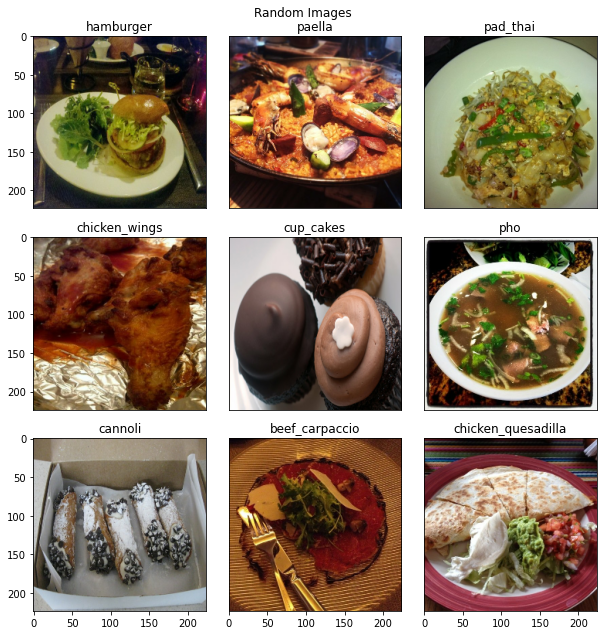

In [15]:
view_random_images(train_data,class_names)

# 🔰============= Build Model ============= 🔰
  * ### To start **train on 10% of images** to establish a baseline.
  * ### **Random guessing** would produce an **accuracy of 1%**.

In [16]:
from helper_functions import Training_Plot, BuildCompileFit, ContinueTraining
from helper_functions import create_tensorboard_callback,create_checkpoint_callback

In [17]:
from tensorflow.keras import Sequential,Model,optimizers
from tensorflow.keras.applications import EfficientNetB7
from tensorflow.keras.layers import MaxPool2D, GlobalMaxPooling2D
from tensorflow.keras.layers import  Input, Flatten, Reshape, Dense, Activation, concatenate, Conv2D
from tensorflow.keras.layers import RandomFlip,RandomHeight, RandomWidth, RandomZoom, RandomRotation,Resizing
from tensorflow.keras.callbacks import ModelCheckpoint

In [18]:
class CNTR:
  def __init__(self,start=0):
    self.num = start
  
  def __call__(self):
    self.num += 1
    return self.num - 1

258088960/258076736 [==============================] - 2s 0us/step
Set checkpoint log files to: ./callbacks/checkpoints//model_0/Exp1/220603_001230.ckpt
Set TensorBoard log files to: ./callbacks/tensorboard/model_0/Exp1/220603_001230
Epoch 1/21
106/106 [==============================] - ETA: 0s - loss: 20.9074 - accuracy: 0.1604
Epoch 1: saving model to ./callbacks/checkpoints//model_0/Exp1/220603_001230.ckpt
106/106 [==============================] - 73s 348ms/step - loss: 20.9074 - accuracy: 0.1604 - val_loss: 18.4632 - val_accuracy: 0.2784
Epoch 2/21
106/106 [==============================] - ETA: 0s - loss: 20.9601 - accuracy: 0.2512
Epoch 2: saving model to ./callbacks/checkpoints//model_0/Exp1/220603_001230.ckpt
106/106 [==============================] - 33s 313ms/step - loss: 20.9601 - accuracy: 0.2512 - val_loss: 21.0545 - val_accuracy: 0.3153
Epoch 3/21
106/106 [==============================] - ETA: 0s - loss: 22.4547 - accuracy: 0.2727
Epoch 3: saving model to ./callbacks/ch

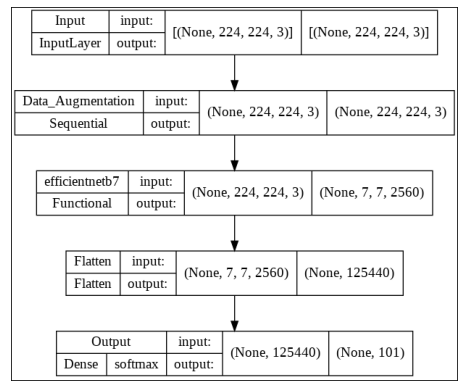

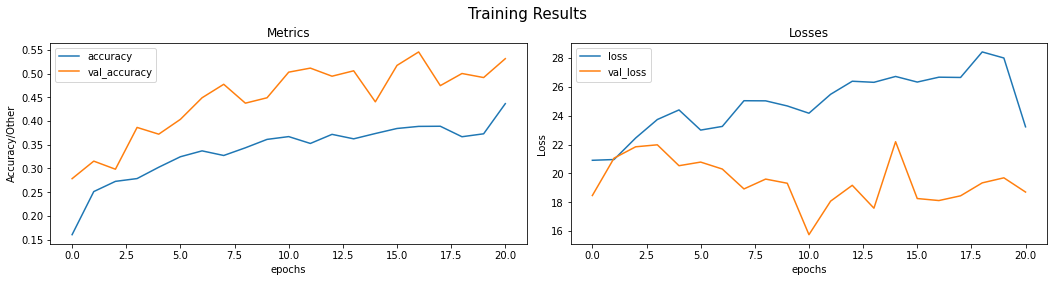

In [19]:
#------------ Setup
SEED = 432
tf.random.set_seed(SEED)
INPUT_SHAPE = IMG_SIZE + (3,)
NUM_CLASSES = len(class_names)
LOSS = 'categorical_crossentropy'
DATA_PERCENT = 0.05
EPOCHS = 21
cntr = CNTR(1)
ExpNum = CNTR(1)
#------------ initilize base layers
layer_data_augment = Sequential([Input(shape=INPUT_SHAPE,name='Aug_Input'),
                                 RandomFlip('horizontal',seed=SEED+1),
                                 RandomRotation(factor=(-0.10,0.10),seed=SEED+2),
                                 RandomHeight(factor=0.05,seed=SEED+3),
                                 RandomWidth(factor=0.05,seed=SEED+4),
                                 RandomZoom(height_factor=0.08,seed=SEED+5),
                                 Resizing(height=IMG_SIZE[0],width=IMG_SIZE[1])
                                ],name='Data_Augmentation')

layer_EffNet = EfficientNetB7(include_top=False,
                              input_shape=INPUT_SHAPE,
                              )
layer_EffNet.trainable = False

#------------ build architecture:

#----- Functional:
n = cntr()
inputs = Input(shape=INPUT_SHAPE,name='Input')
x = layer_data_augment(inputs)
x = layer_EffNet(x)
x = Flatten(name='Flatten')(x)
outputs = Dense(units=NUM_CLASSES, name='Output', activation='softmax')(x)


#---------- setup callbacks
Exp = ExpNum()
checkpoint_file = './callbacks/checkpoints/'
checkpoint_M0 = create_checkpoint_callback(dir_name=checkpoint_file,
                                           experiment_name=f'model_0/Exp{Exp}')


tensorboard_files = './callbacks/tensorboard'
tb_M0 = create_tensorboard_callback(dir_name=tensorboard_files,
                                    experiment_name=f'model_0/Exp{Exp}')

#---------- Build, Compile, Fit:


model_0, history_0 = BuildCompileFit(trn_data=train_data,
                                     val_data=valid_data,
                                     layers=None,
                                     model=Model(inputs,outputs,name='Model_0'),
                                     loss=LOSS,
                                     optimizer=optimizers.Adam(),
                                     metrics=['accuracy'],
                                     callbacks=[checkpoint_M0,tb_M0],
                                     rndSeed=SEED+6,
                                     epochs=EPOCHS,
                                     train_percent=DATA_PERCENT,
                                     validation_percent=DATA_PERCENT,
                                     verbose=1,
                                     show_model=True,
                                     model_name='model_0')




In [20]:
model_0.evaluate(test_data) #.4827

790/790 [==============================] - 185s 234ms/step - loss: 20.7069 - accuracy: 0.4827


[20.706893920898438, 0.4827326834201813]

# 🔑 Generally the Model is fitting well durring training

  * ## After **21 epochs with only 5% of the training data** the model has already achieved ~**49% testing accuracy**. 
  * ## The **training & validation losses** are generally **inline** implying that the **model is not overfitting** the training data.
  * ## Since the **model will likely benefit from continued training**, we can now **increase the data percentage to 25%**.

# 🔰=========== Fine Tuning =========== 🔰


In [21]:
from helper_functions import Show_Is_Trainable

In [22]:
#----- Make the Last 10 layers trainable
layer_EffNet.trainable = False
for layer in layer_EffNet.layers[-10:]:
  layer.trainable = True

Show_Is_Trainable(layer_EffNet,10)

...802 untrainable layers
803 block7d_se_reduce                    True
804 block7d_se_expand                    True
805 block7d_se_excite                    True
806 block7d_project_conv                 True
807 block7d_project_bn                   True
808 block7d_drop                         True
809 block7d_add                          True
810 top_conv                             True
811 top_bn                               True
812 top_activation                       True


Set checkpoint log files to: ./callbacks/checkpoints//model_0/Exp2/220603_002825.ckpt
Set TensorBoard log files to: ./callbacks/tensorboard/model_0/Exp2/220603_002825
steps durring training: 532
steps durring validation: 59
Epoch 21/30
532/532 [==============================] - ETA: 0s - loss: 18.2532 - accuracy: 0.5136
Epoch 21: saving model to ./callbacks/checkpoints//model_0/Exp2/220603_002825.ckpt
532/532 [==============================] - 177s 287ms/step - loss: 18.2532 - accuracy: 0.5136 - val_loss: 13.9967 - val_accuracy: 0.5969
Epoch 22/30
532/532 [==============================] - ETA: 0s - loss: 15.9668 - accuracy: 0.5236
Epoch 22: saving model to ./callbacks/checkpoints//model_0/Exp2/220603_002825.ckpt
532/532 [==============================] - 147s 276ms/step - loss: 15.9668 - accuracy: 0.5236 - val_loss: 12.3465 - val_accuracy: 0.6303
Epoch 23/30
532/532 [==============================] - ETA: 0s - loss: 13.8415 - accuracy: 0.5539
Epoch 23: saving model to ./callbacks/chec

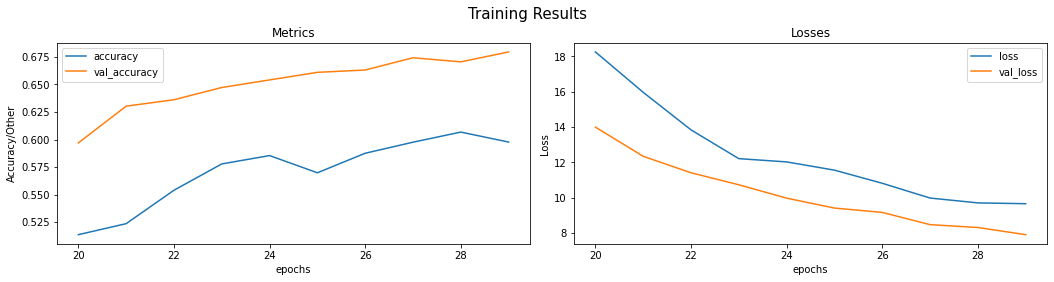

In [23]:
DATA_PERCENT = 0.25
new_epochs = 10
last_epoch_number = history_0.epoch[-1]
total_epochs = last_epoch_number + new_epochs

model_0.compile(optimizer=optimizers.Adam(learning_rate=10**-4),
                loss=LOSS,
                metrics=['accuracy'])

Exp = ExpNum()
checkpoint_file = './callbacks/checkpoints/'
checkpoint_M0 = create_checkpoint_callback(dir_name=checkpoint_file,
                                           experiment_name=f'model_0/Exp{Exp}')


tensorboard_files = './callbacks/tensorboard'
tb_M0 = create_tensorboard_callback(dir_name=tensorboard_files,
                                    experiment_name=f'model_0/Exp{Exp}')

model_0, history_0 = ContinueTraining(trn_data=train_data,
                                      val_data=valid_data,
                                      model=model_0,
                                      callbacks=[checkpoint_M0,tb_M0],
                                      epochs=total_epochs,
                                      initial_epoch=last_epoch_number,
                                      train_percent=DATA_PERCENT,
                                      validation_percent=DATA_PERCENT,
                                      verbose=1)

In [24]:
model_0.evaluate(test_data) #.5996

790/790 [==============================] - 184s 233ms/step - loss: 10.5057 - accuracy: 0.5996


[10.50574779510498, 0.5995643734931946]

# ⚡ After 30 Epochs, and **Fine-Tuning on 25% of the train data** the model is able to achieve **~60% test accuracy**. 

# 🔑 This is a **20% boost** over the baseline. 

# The model will continue to be fine-tuned. 

In [25]:
#----- Make the Last 6 layers trainable
layer_EffNet.trainable = False
for layer in layer_EffNet.layers[-6:]:
  layer.trainable = True

Show_Is_Trainable(layer_EffNet,6)

...806 untrainable layers
807 block7d_project_bn                   True
808 block7d_drop                         True
809 block7d_add                          True
810 top_conv                             True
811 top_bn                               True
812 top_activation                       True


Set checkpoint log files to: ./callbacks/checkpoints//model_0/Exp3/220603_012719.ckpt
Set TensorBoard log files to: ./callbacks/tensorboard/model_0/Exp3/220603_012719
steps durring training: 1065
steps durring validation: 118
Epoch 30/39
1065/1065 [==============================] - ETA: 0s - loss: 8.4081 - accuracy: 0.6209
Epoch 30: saving model to ./callbacks/checkpoints//model_0/Exp3/220603_012719.ckpt
1065/1065 [==============================] - 323s 281ms/step - loss: 8.4081 - accuracy: 0.6209 - val_loss: 7.1551 - val_accuracy: 0.6774
Epoch 31/39
1065/1065 [==============================] - ETA: 0s - loss: 8.3754 - accuracy: 0.6159
Epoch 31: saving model to ./callbacks/checkpoints//model_0/Exp3/220603_012719.ckpt
1065/1065 [==============================] - 293s 275ms/step - loss: 8.3754 - accuracy: 0.6159 - val_loss: 6.5698 - val_accuracy: 0.6843
Epoch 32/39
1065/1065 [==============================] - ETA: 0s - loss: 7.2698 - accuracy: 0.6388
Epoch 32: saving model to ./callbacks

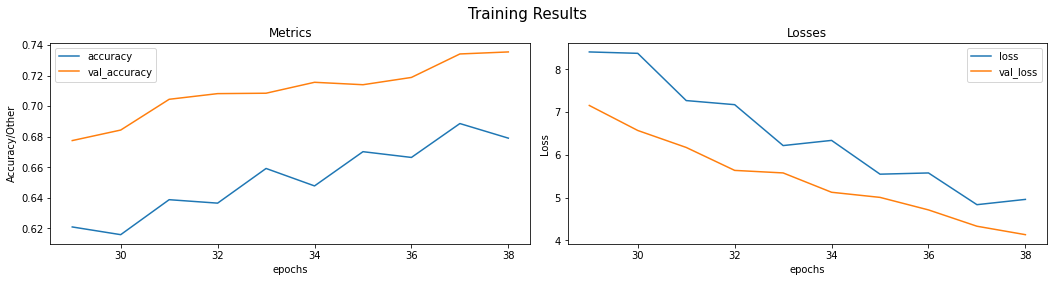

In [26]:
DATA_PERCENT = 0.50
new_epochs = 10
last_epoch_number = history_0.epoch[-1]
total_epochs = last_epoch_number + new_epochs

model_0.compile(optimizer=optimizers.Adam(learning_rate=10**-4),
                loss=LOSS,
                metrics=['accuracy'])

Exp = ExpNum()
checkpoint_file = './callbacks/checkpoints/'
checkpoint_M0 = create_checkpoint_callback(dir_name=checkpoint_file,
                                           experiment_name=f'model_0/Exp{Exp}')


tensorboard_files = './callbacks/tensorboard'
tb_M0 = create_tensorboard_callback(dir_name=tensorboard_files,
                                    experiment_name=f'model_0/Exp{Exp}')

model_0, history_0 = ContinueTraining(trn_data=train_data,
                                      val_data=valid_data,
                                      model=model_0,
                                      callbacks=[checkpoint_M0,tb_M0],
                                      epochs=total_epochs,
                                      initial_epoch=last_epoch_number,
                                      train_percent=DATA_PERCENT,
                                      validation_percent=DATA_PERCENT,
                                      verbose=1)

In [27]:
model_0.evaluate(test_data) 

790/790 [==============================] - 185s 235ms/step - loss: 7.9390 - accuracy: 0.6086


[7.939023017883301, 0.608554482460022]

## ❗Interestingly there was no improvement between the last two training runs even though the training & the validation sets improved. This is likely because the test set is dissimilar to both the train and validation set.

In [28]:
#----- Make the Last 3 layers trainable
layer_EffNet.trainable = False
for layer in layer_EffNet.layers[-3:]:
  layer.trainable = True

Show_Is_Trainable(layer_EffNet,3)

...809 untrainable layers
810 top_conv                             True
811 top_bn                               True
812 top_activation                       True


Set checkpoint log files to: ./callbacks/checkpoints//model_0/Exp4/220603_023254.ckpt
Set TensorBoard log files to: ./callbacks/tensorboard/model_0/Exp4/220603_023254
steps durring training: 1598
steps durring validation: 177
Epoch 39/43
1598/1598 [==============================] - ETA: 0s - loss: 4.5036 - accuracy: 0.6937
Epoch 39: saving model to ./callbacks/checkpoints//model_0/Exp4/220603_023254.ckpt
1598/1598 [==============================] - 468s 277ms/step - loss: 4.5036 - accuracy: 0.6937 - val_loss: 3.9553 - val_accuracy: 0.7369
Epoch 40/43
1598/1598 [==============================] - ETA: 0s - loss: 4.1386 - accuracy: 0.7036
Epoch 40: saving model to ./callbacks/checkpoints//model_0/Exp4/220603_023254.ckpt
1598/1598 [==============================] - 439s 275ms/step - loss: 4.1386 - accuracy: 0.7036 - val_loss: 3.7982 - val_accuracy: 0.7475
Epoch 41/43
1598/1598 [==============================] - ETA: 0s - loss: 3.9593 - accuracy: 0.7100
Epoch 41: saving model to ./callbacks

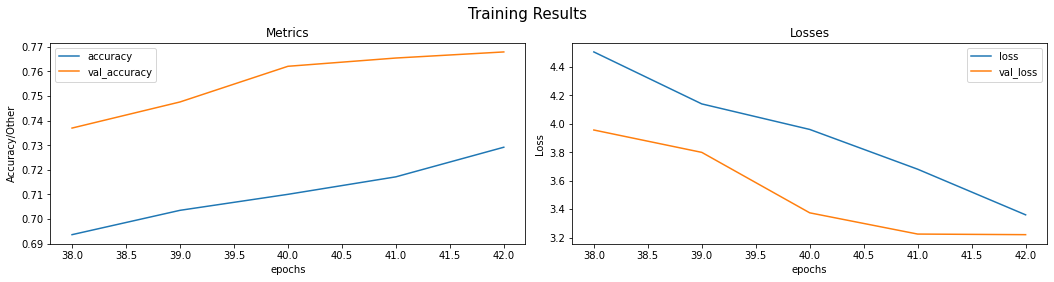

In [29]:
DATA_PERCENT = 0.75
new_epochs = 5
last_epoch_number = history_0.epoch[-1]
total_epochs = last_epoch_number + new_epochs

model_0.compile(optimizer=optimizers.Adam(learning_rate=10**-4),
                loss=LOSS,
                metrics=['accuracy'])

Exp = ExpNum()
checkpoint_file = './callbacks/checkpoints/'
checkpoint_M0 = create_checkpoint_callback(dir_name=checkpoint_file,
                                           experiment_name=f'model_0/Exp{Exp}')


tensorboard_files = './callbacks/tensorboard'
tb_M0 = create_tensorboard_callback(dir_name=tensorboard_files,
                                    experiment_name=f'model_0/Exp{Exp}')

model_0, history_0 = ContinueTraining(trn_data=train_data,
                                      val_data=valid_data,
                                      model=model_0,
                                      callbacks=[checkpoint_M0,tb_M0],
                                      epochs=total_epochs,
                                      initial_epoch=last_epoch_number,
                                      train_percent=DATA_PERCENT,
                                      validation_percent=DATA_PERCENT,
                                      verbose=1)

In [30]:
model_0.evaluate(test_data)

790/790 [==============================] - 186s 235ms/step - loss: 7.3178 - accuracy: 0.6068


[7.317776679992676, 0.6067723035812378]

# 🔑 The model has stabalized with a test accuracy of 60%. 
# 🔑 One last round of training with the full datasets will be used to round off the model. 

In [31]:
#----- Turn off fine-tunning
layer_EffNet.trainable = False

Set checkpoint log files to: ./callbacks/checkpoints//model_0/Exp5/220603_032327.ckpt
Set TensorBoard log files to: ./callbacks/tensorboard/model_0/Exp5/220603_032327
steps durring training: 2131
steps durring validation: 237
Epoch 43/45
2131/2131 [==============================] - ETA: 0s - loss: 2.5530 - accuracy: 0.7759
Epoch 43: saving model to ./callbacks/checkpoints//model_0/Exp5/220603_032327.ckpt
2131/2131 [==============================] - 614s 277ms/step - loss: 2.5530 - accuracy: 0.7759 - val_loss: 2.7314 - val_accuracy: 0.7919
Epoch 44/45
2131/2131 [==============================] - ETA: 0s - loss: 2.4301 - accuracy: 0.7837
Epoch 44: saving model to ./callbacks/checkpoints//model_0/Exp5/220603_032327.ckpt
2131/2131 [==============================] - 588s 276ms/step - loss: 2.4301 - accuracy: 0.7837 - val_loss: 2.6606 - val_accuracy: 0.7939
Epoch 45/45
2131/2131 [==============================] - ETA: 0s - loss: 2.3509 - accuracy: 0.7883
Epoch 45: saving model to ./callbacks

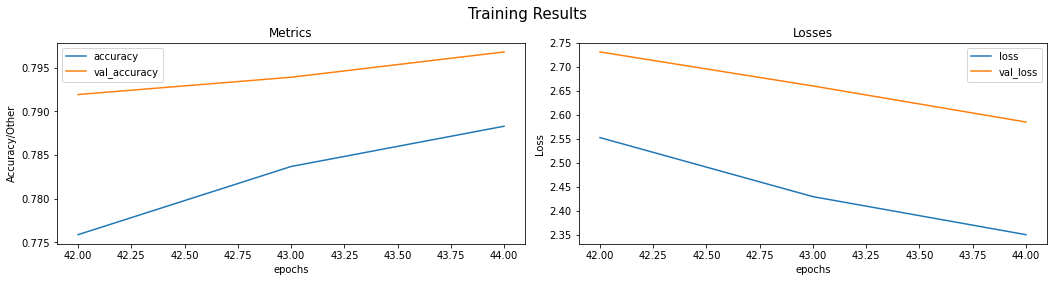

In [32]:
DATA_PERCENT = 1.0
new_epochs = 3
last_epoch_number = history_0.epoch[-1]
total_epochs = last_epoch_number + new_epochs

model_0.compile(optimizer=optimizers.Adam(learning_rate=10**-5),
                loss=LOSS,
                metrics=['accuracy'])

Exp = ExpNum()
checkpoint_file = './callbacks/checkpoints/'
checkpoint_M0 = create_checkpoint_callback(dir_name=checkpoint_file,
                                           experiment_name=f'model_0/Exp{Exp}')


tensorboard_files = './callbacks/tensorboard'
tb_M0 = create_tensorboard_callback(dir_name=tensorboard_files,
                                    experiment_name=f'model_0/Exp{Exp}')

model_0, history_0 = ContinueTraining(trn_data=train_data,
                                      val_data=valid_data,
                                      model=model_0,
                                      callbacks=[checkpoint_M0,tb_M0],
                                      epochs=total_epochs,
                                      initial_epoch=last_epoch_number,
                                      train_percent=DATA_PERCENT,
                                      validation_percent=DATA_PERCENT,
                                      verbose=1)

In [33]:
model_0.evaluate(test_data) #.6242

790/790 [==============================] - 185s 235ms/step - loss: 6.5379 - accuracy: 0.6242


[6.5378618240356445, 0.6241584420204163]

## 🔰====================================================================== 🔰
## Currently the model was able to achieve a **62.4% test accuracy**, which is a **25% improvement** over the authors 50% baseline.  

## It appears That the training curves have not yet flattened and would likely see further improvement with more training. 

In [34]:
!zip -r /content/callbacks.zip /content/callbacks

  adding: content/callbacks/ (stored 0%)
  adding: content/callbacks/tensorboard/ (stored 0%)
  adding: content/callbacks/tensorboard/model_0/ (stored 0%)
  adding: content/callbacks/tensorboard/model_0/Exp3/ (stored 0%)
  adding: content/callbacks/tensorboard/model_0/Exp3/220603_012719/ (stored 0%)
  adding: content/callbacks/tensorboard/model_0/Exp3/220603_012719/validation/ (stored 0%)
  adding: content/callbacks/tensorboard/model_0/Exp3/220603_012719/validation/events.out.tfevents.1654219928.8472f78831ad.88.5.v2 (deflated 73%)
  adding: content/callbacks/tensorboard/model_0/Exp3/220603_012719/train/ (stored 0%)
  adding: content/callbacks/tensorboard/model_0/Exp3/220603_012719/train/events.out.tfevents.1654219639.8472f78831ad.88.4.v2 (deflated 94%)
  adding: content/callbacks/tensorboard/model_0/Exp1/ (stored 0%)
  adding: content/callbacks/tensorboard/model_0/Exp1/220603_001230/ (stored 0%)
  adding: content/callbacks/tensorboard/model_0/Exp1/220603_001230/validation/ (stored 0%)


In [35]:
from google.colab import files
files.download('/content/callbacks.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 🔰=========== Review Performance ======== 🔰

In [36]:
from sklearn.metrics import confusion_matrix
from itertools import product
import numpy as np
import matplotlib.pyplot as plt

In [37]:
y_pred = model_0.predict(test_data)
y_pred = y_pred.argmax(axis=1)
print(y_pred.shape)

(25250,)


In [38]:
y_test = []
for img,label in test_data.unbatch():
  y_test.append(label.numpy().argmax())

y_test = np.array(y_test)
print(y_test.shape)

(25250,)


In [40]:
from helper_functions import Plot_CM

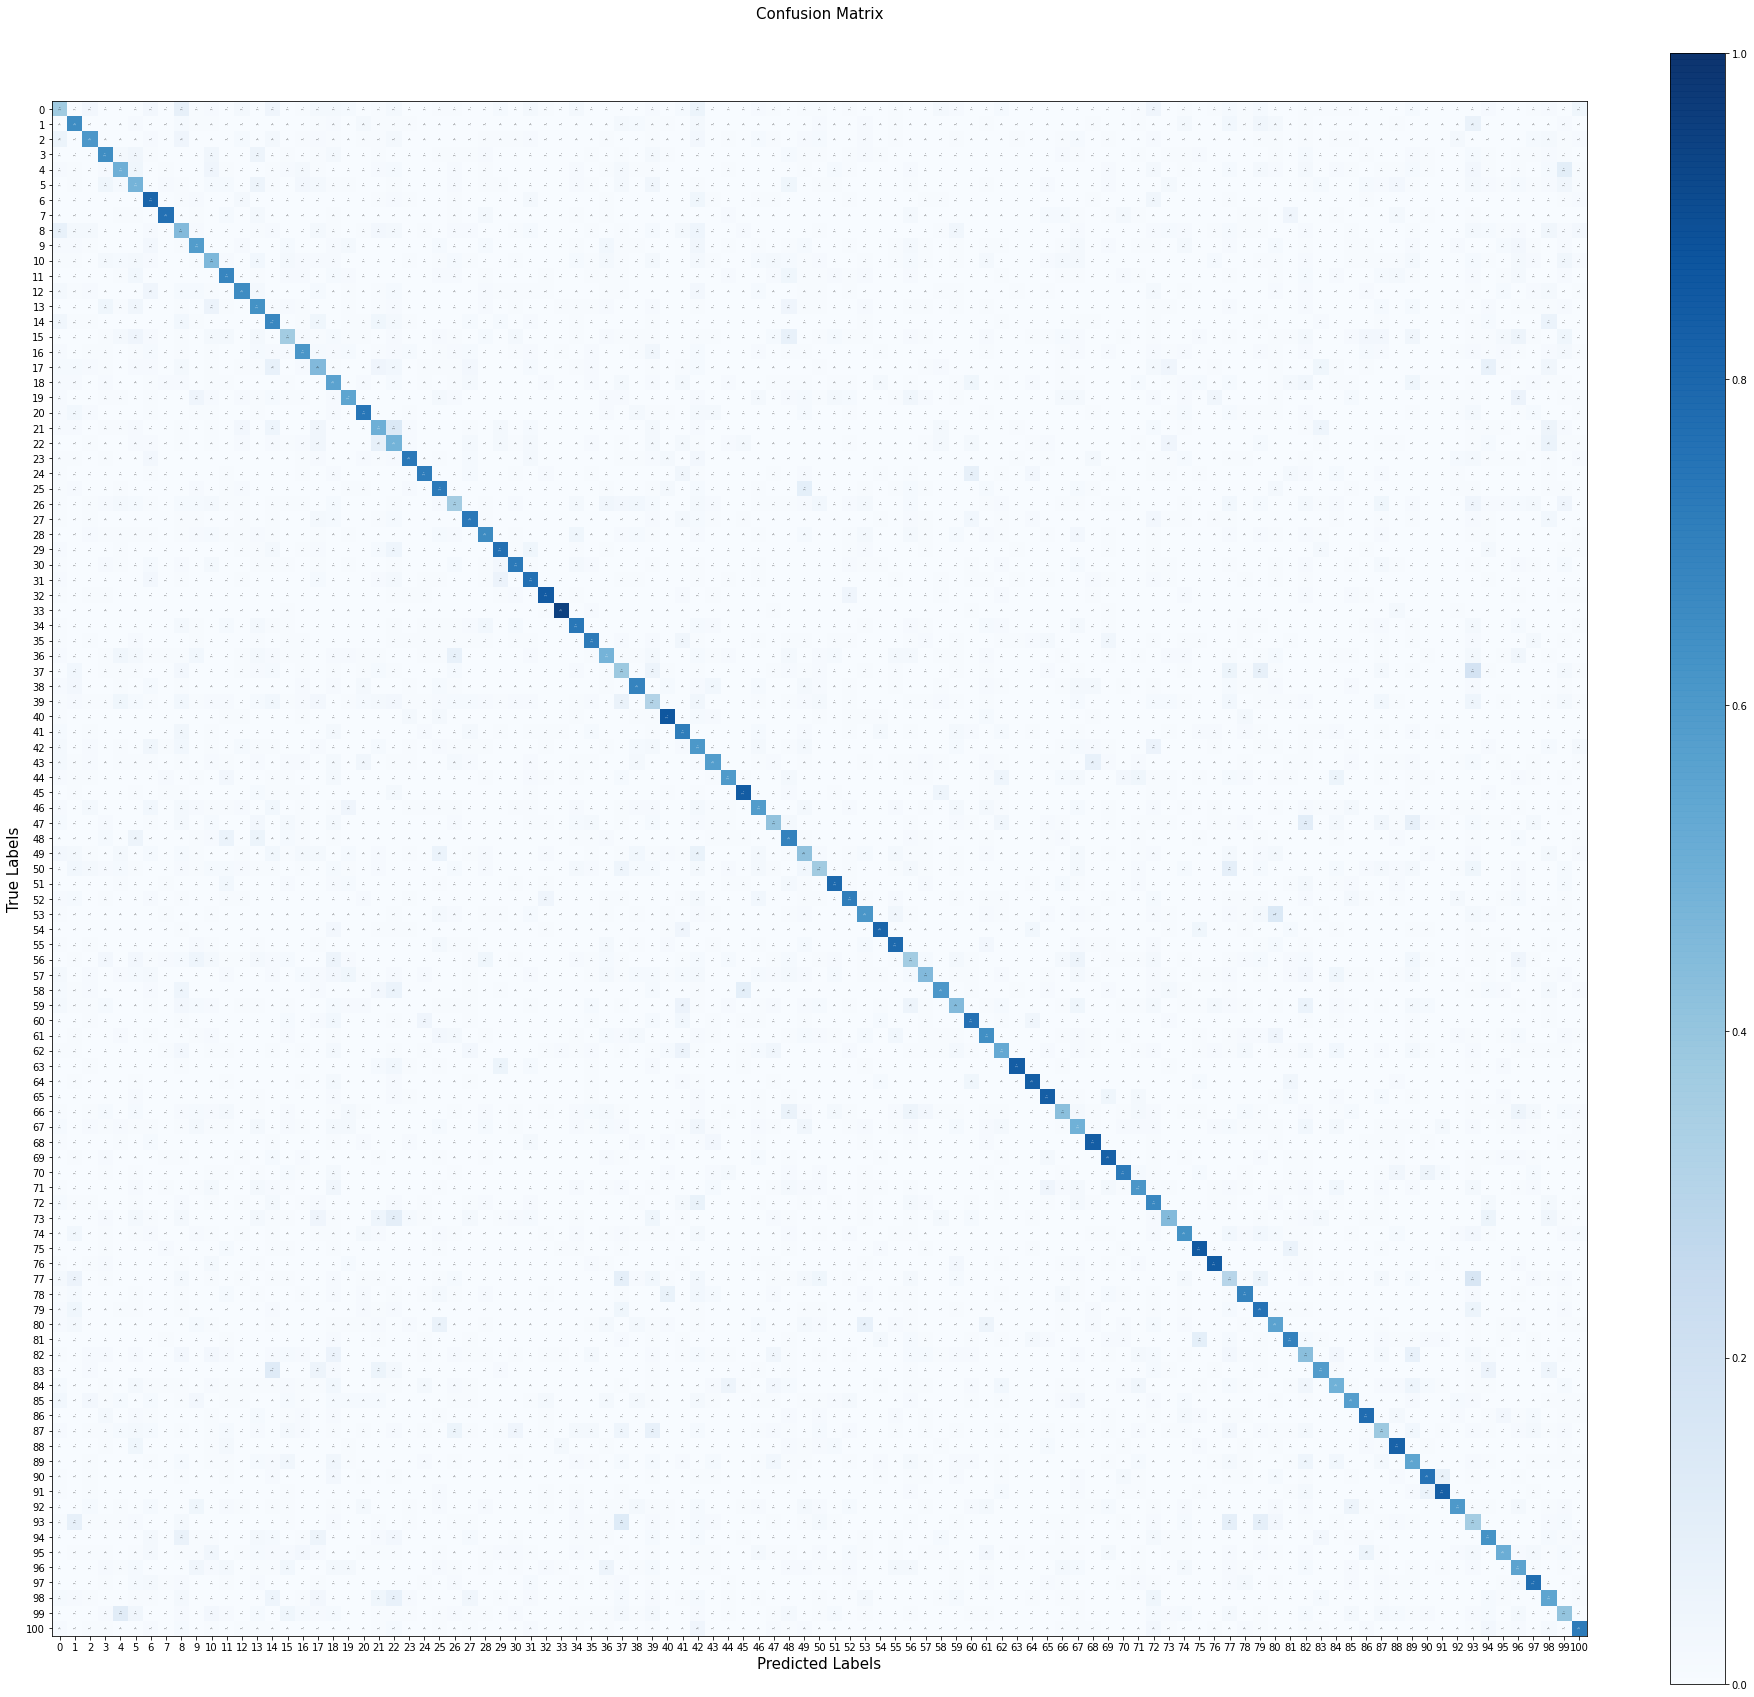

In [41]:
cm_norm = Plot_CM(y_test,y_pred,figsize=(30,30),txt_size=1.0)

In [42]:
from sklearn.metrics import classification_report
from pandas import DataFrame

In [54]:
print(classification_report(y_true=y_test,
                            y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.37      0.37      0.37       250
           1       0.56      0.66      0.61       250
           2       0.66      0.61      0.63       250
           3       0.64      0.66      0.65       250
           4       0.55      0.50      0.53       250
           5       0.44      0.48      0.46       250
           6       0.61      0.81      0.70       250
           7       0.90      0.77      0.83       250
           8       0.35      0.45      0.39       250
           9       0.59      0.59      0.59       250
          10       0.46      0.46      0.46       250
          11       0.62      0.68      0.65       250
          12       0.75      0.66      0.70       250
          13       0.52      0.64      0.58       250
          14       0.49      0.67      0.57       250
          15       0.47      0.36      0.41       250
          16       0.66      0.62      0.64       250
          17       0.46    

In [75]:
#==== Create Dictionary of F1 scores
class_f1 = {}
for key, val in classification_report(y_test,y_pred,output_dict=True).items():
  if key not in ('accuracy', 'macro avg', 'weighted avg'):
    class_f1[class_names[int(key)]] = {'F1':val['f1-score'],'precision':val['precision'],'recall':val['recall']}

#==== Create DataFrame
df = DataFrame.from_dict(class_f1,orient='index',columns=['F1','precision','recall'])

In [77]:
df.sort_values(by='F1')

,F1,precision,recall
steak,0.291326,0.246537,0.356
pork_chop,0.296443,0.292969,0.300
foie_gras,0.316000,0.316000,0.316
filet_mignon,0.360531,0.342960,0.380
apple_pie,0.369048,0.366142,0.372
...,...,...,...
dumplings,0.845238,0.838583,0.852
spaghetti_carbonara,0.849593,0.863636,0.836
pizza,0.854839,0.861789,0.848
macarons,0.895522,0.958904,0.840


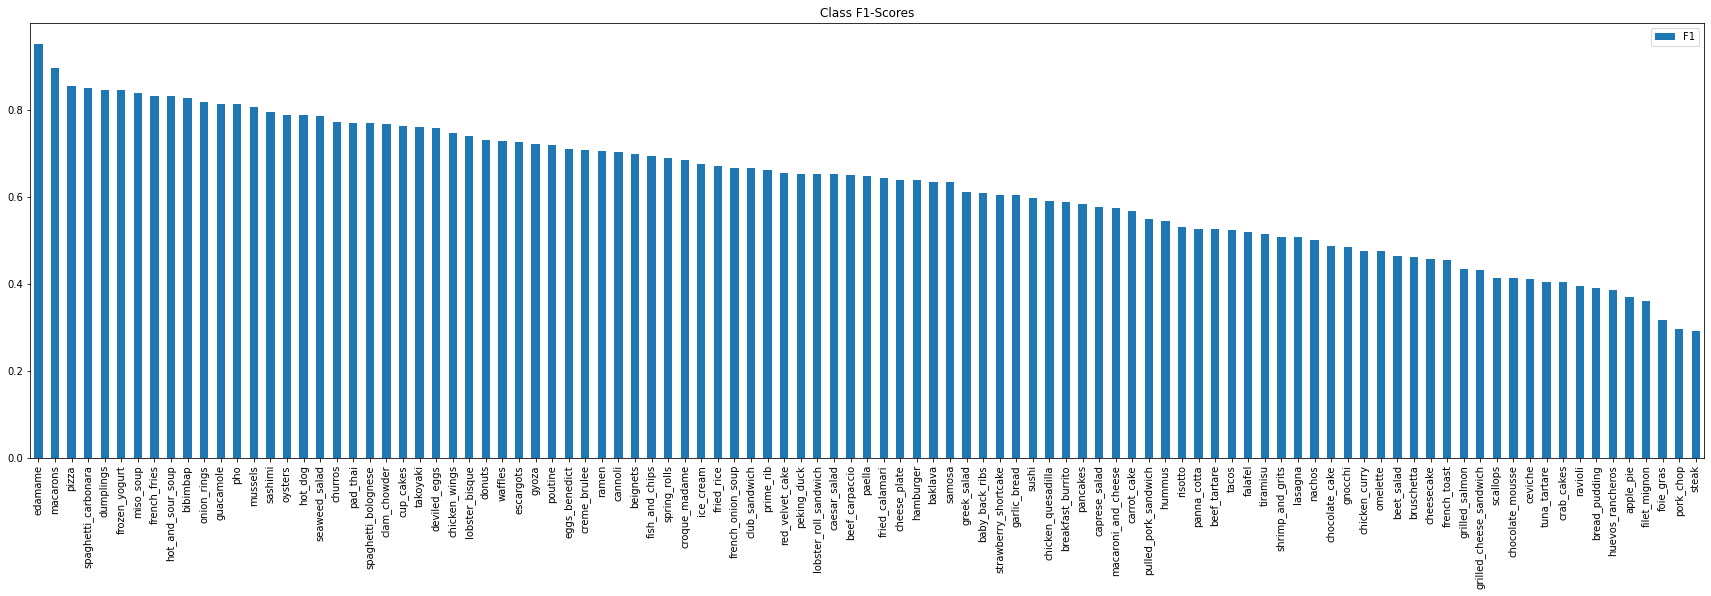

In [80]:
ax = df.sort_values(by='F1',ascending=False).plot(y='F1',kind='bar',figsize=(30,8),title='Class F1-Scores')

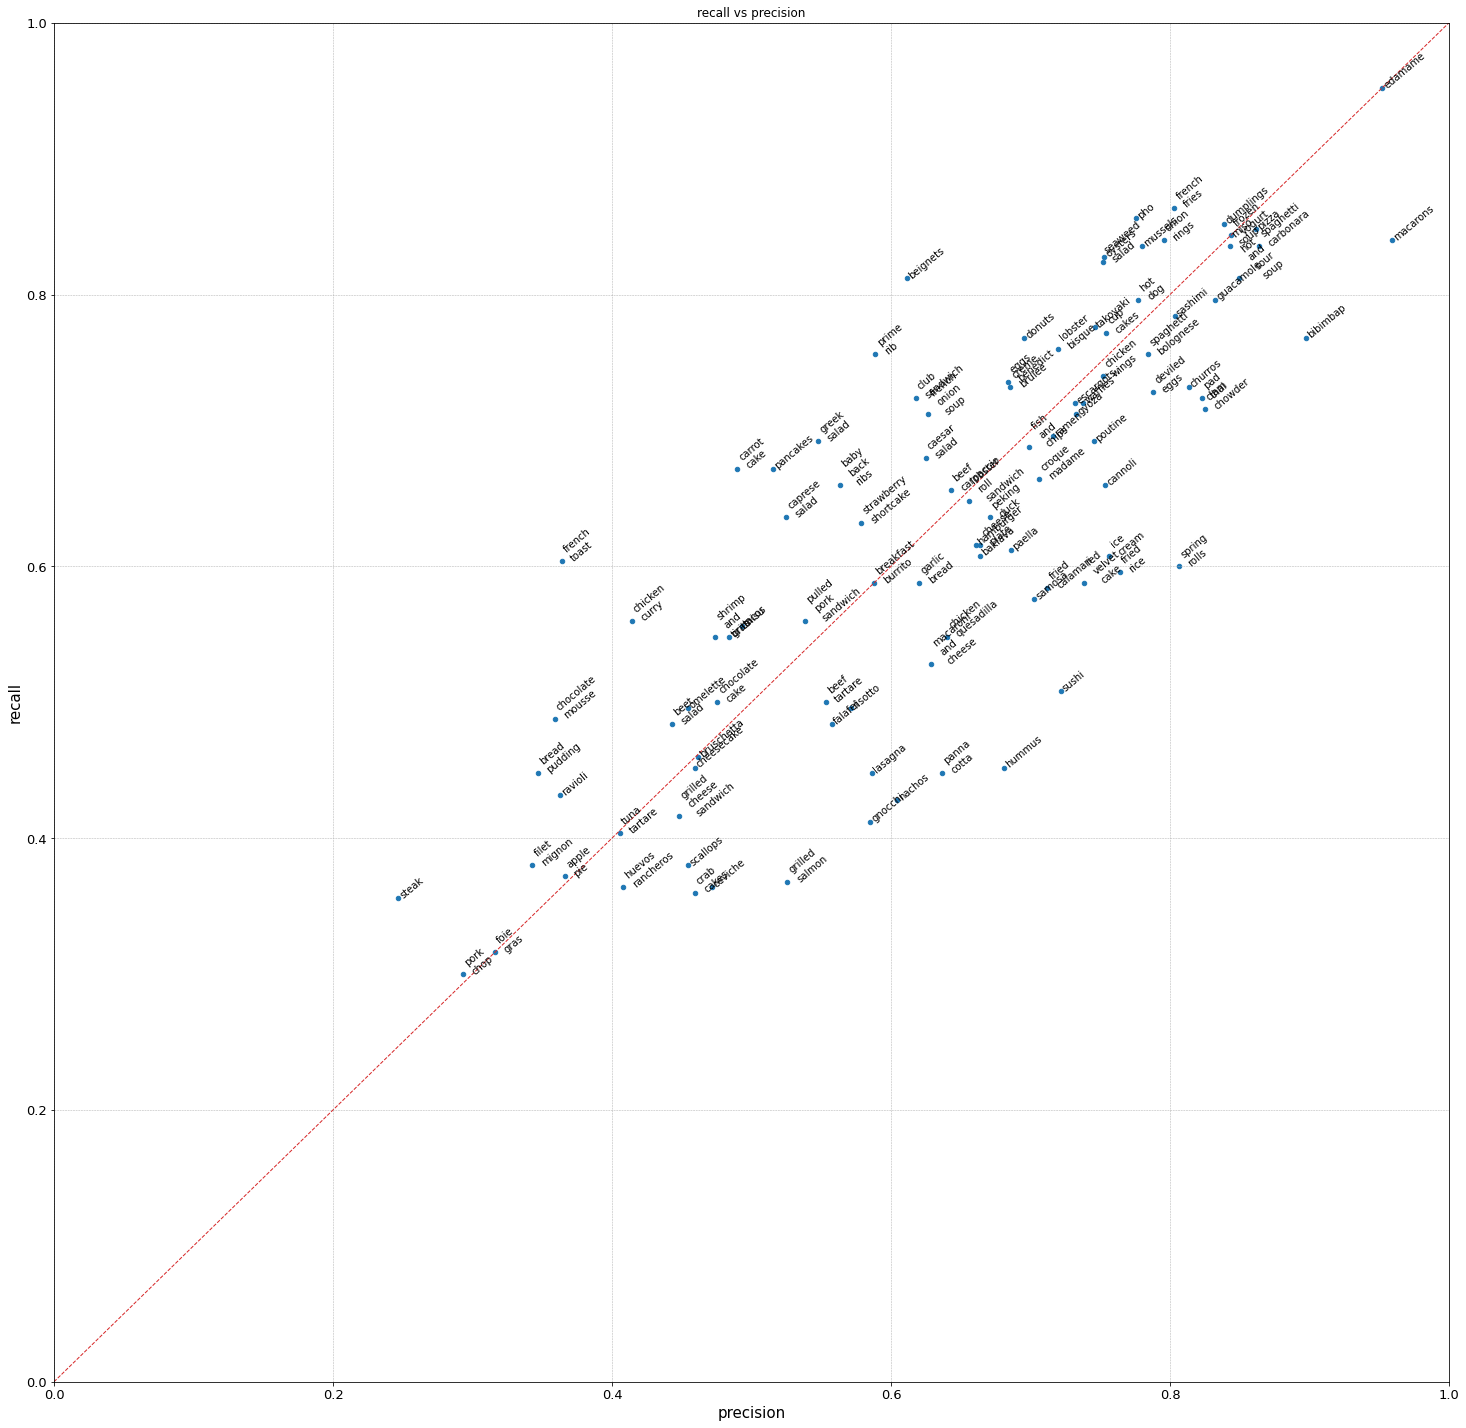

In [79]:
#================ Visualize Recall vs Precision:
df = df.fillna(0)
ax = df.plot(x='precision',y='recall',kind='scatter',figsize=(25,25),fontsize=13,c='tab:blue')
ax.plot(np.linspace(0,1,50),np.linspace(0,1,50),ls='--',c='tab:red',lw=1.0)
ax.grid(True,axis='both',lw=0.5,ls='--')
_=ax.set_ylabel('recall',fontdict={'fontsize':15})
_=ax.set_xlabel('precision',fontdict={'fontsize':15})
_=ax.set_ylim(0,1)
_=ax.set_xlim(0,1)
_=ax.set_title('recall vs precision')
for name,vals in df.T.items():
  _ = ax.text(vals['precision'],vals['recall'],s=name.replace('_','\n'),fontsize=10,rotation=40)